## 1. Откроем файл с данными и изучим общую информацию

In [13]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from functools import reduce
import random

In [14]:
calls = pd.read_csv('/datasets/calls.csv')
internet=pd.read_csv('/datasets/internet.csv')
messages=pd.read_csv('/datasets/messages.csv')
tariffs=pd.read_csv('/datasets/tariffs.csv')
users=pd.read_csv('/datasets/users.csv')

In [15]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [16]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [17]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [18]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [19]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [20]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True) #для удобства

Изучили данные, выглядит опрятно.

##  2. Подготовка данных

##  2.1 Проверяем тип данных и меняем на нужный

In [21]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'],
format='%Y-%m-%d')
#переводим столбец с датой в формат даты

In [23]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [24]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [25]:
internet['session_date'] = pd.to_datetime(internet['session_date'],
format='%Y-%m-%d')
#переводим столбец с датой в формат даты

In [26]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [27]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'],
format='%Y-%m-%d')
#переводим столбец с датой в формат даты

In [29]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [30]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff                 2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [31]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [32]:
users['churn_date'] = pd.to_datetime(users['churn_date'],
format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'],
format='%Y-%m-%d')
#переводим столбцы с датой в формат даты

In [33]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


##  2.2 Ищем дубликаты

In [34]:
print(users.duplicated().sum(),
    tariffs.duplicated().sum(),
    messages.duplicated().sum(),
    internet.duplicated().sum(),
    calls.duplicated().sum())
#проверяем наличие дубликатов

0 0 0 0 0


У всех данных нужный тип

Посчитаем для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

##  2.3 Создаем столбцы с месяцами и округляем звонки

In [35]:
messages['month'] = messages['message_date'].dt.month
#создаем столбец с месяцем сообщения

In [36]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [37]:
calls['month'] = calls['call_date'].dt.month
#создаем столбец с месяцем звонка

calls['duration'] = np.ceil(calls['duration'])
#с помощью функции округляем каджый звонок до минут в большую сторону

In [38]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


In [39]:
internet['month'] = internet['session_date'].dt.month
#создаем столбец с месяцем использования трафика
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


## 2.4 Создаем таблицы услуг за месяц для каждого пользователя

In [40]:
calls_groupby= pd.DataFrame(calls.groupby(['user_id','month'])['duration'].sum())
calls_groupby.head()
#таблица с количеством звонков по месяцам для каждого пользователя

duration
user_id month          
1000    5         159.0
        6         172.0
        7         340.0
        8         408.0
        9         466.0

In [41]:
internet_groupby= pd.DataFrame(internet.groupby(['user_id','month'])['mb_used'].sum())
internet_groupby.head()
#таблица с количеством израсходованых мегабайт по месяцам для каждого пользователя

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

In [42]:
messages_groupby=pd.DataFrame(messages.groupby(['user_id','month'])['message_date'].count())
messages_groupby.head()
#таблица с количеством сообщений по месяцам для каждого пользователя

message_date
user_id month              
1000    5                22
        6                60
        7                75
        8                81
        9                57

##  2.5 Соединяем все в одну таблицу

In [43]:
#соединяем созданные таблицы с таблицами "пользователи" и "тарифы" и получаем один датафрейм со всеми нужными данными 
data_frames = [messages_groupby, internet_groupby, calls_groupby]
df_groupby = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','month'],how='outer'), data_frames).reset_index()

df_groupby = df_groupby.merge(users,  on=['user_id']).merge(tariffs, on=['tariff'])
df_groupby.head()

,user_id,month,message_date,mb_used,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [44]:
df_groupby['user_id'].value_counts()

1372    12
1227    12
1135    12
1472    12
1134    12
        ..
1140     1
1434     1
1297     1
1252     1
1445     1
Name: user_id, Length: 498, dtype: int64

##  2.6 Добавляем столбец с прибылью от пользователя

In [45]:
def price_per_month(data):

        cell =data['duration'] -data['minutes_included']           #проверяем уложился ли пользователь в лимит тарифа
        if cell <0:
            cell =0     #0 если не израсходовал лишнего
        else:
            cell =cell
        pay_cell = cell *data['rub_per_minute']          #умножаем излишки на тарифный план
        
        messages =data['message_date'] -data['messages_included']  #проверяем уложился ли пользователь в лимит тарифа
        if messages <0:
            messages =0 #0 если не израсходовал лишнего
        else:
            messages =messages
        pay_messages = messages *data['rub_per_message']  #умножаем излишки на тарифный план
        
        mb =data['mb_used'] -data['mb_per_month_included']          #проверяем уложился ли пользователь в лимит тарифа
        if mb <0:
            mb =0       #0 если не израсходовал лишнего
        else:
            mb = mb /1024
            mb = math.ceil(mb)
        pay_mb = mb *data['rub_per_gb']                    #умножаем излишки на тарифный план
        
        result=pay_messages+pay_cell+pay_mb+data['rub_monthly_fee'] #суммируем все и прибавляем цену за тариф в месяц
        
        
        return result 
#данная функция благополучно высчитывает выручку за каждый месяц для каждого пользователя

In [46]:
df_groupby['duration']= df_groupby['duration'].fillna(0)
df_groupby['message_date']= df_groupby['message_date'].fillna(0)
df_groupby['mb_used']= df_groupby['mb_used'].fillna(0)

In [47]:
df_groupby['result']=df_groupby.apply(price_per_month, axis=1)
df_groupby.head()
#применяем функцию и смотрим результат

,user_id,month,message_date,mb_used,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,result
0,1000,5,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


Отлично, мы подготовили данные для анализа.

##  3 Проанализируем данные

##  3.1 Анализ звонков

In [48]:
mean_calls=df_groupby.pivot_table(
    columns='tariff',
    values='duration',
    aggfunc='mean'
)
mean_calls
#создаем таблицу использованых минут в среднем в месяц для каждого тарифа

tariff,smart,ultra
duration,417.934948,526.62335


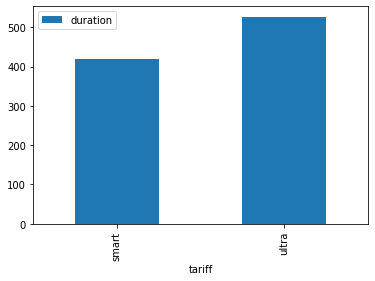

In [49]:
mean_calls.T.plot(kind="bar")
plt.show()

#выводим график использованых минут в среднем в месяц для каждого тарифа

На этом графике видно что в данной выборке в среднем в месяц больше минут для разговора исполюзут пользователи тарифа ultra.

In [50]:
mean_month_calls =pd.DataFrame(df_groupby.groupby(['tariff','month'])['duration'].mean())

mean_month_calls

duration
tariff month            
smart  1      203.852941
       2      298.689655
       3      390.051948
       4      367.133929
       5      387.361702
       6      395.640244
       7      408.353234
       8      421.468085
       9      428.611538
       10     426.136054
       11     435.265823
       12     478.560831
ultra  1      428.111111
       2      297.125000
       3      489.648649
       4      458.018182
       5      510.328358
       6      479.702381
       7      545.791209
       8      510.775701
       9      539.443478
       10     558.081301
       11     541.380597
       12     592.805755

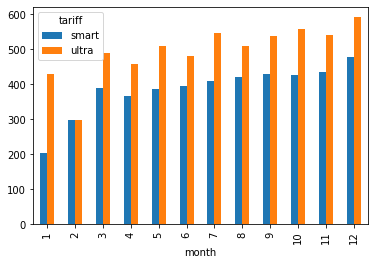

In [51]:
mean_month_calls.pivot_table(index='tariff' ,columns='month', values='duration').T.plot(kind="bar")
plt.show()
#выводим график использованых минут по месяцам для каждого тарифа

Этот график даёт нам понять, что для данной выборки звонки совершают пользователи разных тарифов по похожей периодичности: в начале года меньше всего разговоров и в течение календарного года растет до самого нового года, правда у пользователей ultra заметно только низкое количество в первые два месяца  и максимальное в последний месяц года.

In [52]:
variance_month_calls = np.var(mean_month_calls['duration'], ddof=1)
print('{:.2f}'.format(variance_month_calls))
#дисперсия по всем тарифам 

8475.52


In [53]:
print('{:.2f}'.format(math.sqrt(variance_month_calls)))
#стандартное откронение по всем тарифам

92.06


In [54]:
mean_smart_month_calls=mean_month_calls.query('tariff == "smart"')
mean_smart_month_calls

duration
tariff month            
smart  1      203.852941
       2      298.689655
       3      390.051948
       4      367.133929
       5      387.361702
       6      395.640244
       7      408.353234
       8      421.468085
       9      428.611538
       10     426.136054
       11     435.265823
       12     478.560831

In [55]:
variance_smart_month_calls = np.var(mean_smart_month_calls['duration'], ddof=1)
print('{:.2f}'.format(variance_smart_month_calls))
#дисперсия по тарифу smart

5221.80


In [56]:
print('{:.2f}'.format(math.sqrt(variance_smart_month_calls)))
#стандартное откронение по тарифу smart

72.26


In [57]:
mean_ultra_month_calls=mean_month_calls.query('tariff == "ultra"')
mean_ultra_month_calls
#стандартное откронение по тарифу ultra

duration
tariff month            
ultra  1      428.111111
       2      297.125000
       3      489.648649
       4      458.018182
       5      510.328358
       6      479.702381
       7      545.791209
       8      510.775701
       9      539.443478
       10     558.081301
       11     541.380597
       12     592.805755

In [58]:
variance_ultra_month_calls = np.var(mean_ultra_month_calls['duration'], ddof=1)
print('{:.2f}'.format(variance_ultra_month_calls))
#дисперсия по тарифу ultra

5998.51


In [59]:
print('{:.2f}'.format(math.sqrt(variance_ultra_month_calls)))
#стандартное откронение по тарифу ultra

77.45


In [60]:
calls_mean =pd.DataFrame(df_groupby.groupby(['month'])['duration'].mean())

calls_mean
#в среднем минут разговора в месяц

,duration
month,
1,250.790698
2,298.231707
3,422.377193
4,397.065868
5,426.971154
6,424.112903
7,451.184932
8,449.409357
9,462.600000


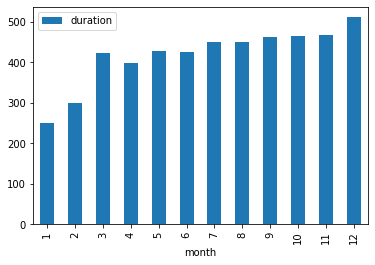

In [61]:
calls_mean.pivot_table(columns='month', values='duration').T.plot(kind="bar")
plt.show()
#гистограмма распределения использованных минут в начале года меньше всего разговоров и в течение календарного года растет до самого нового года

Данный график дает нам понять, что в начале года меньше всего разговоров и в течение календарного года их количество растет до самого нового года. Виден небольшой пик в марте и выеделяющееся низкое значение в первые 2 месяца.

Закончили со звонками.

##  3.2 Анализ сообщений

In [62]:
mean_messages=df_groupby.pivot_table(

    columns='tariff',
    values='message_date',
    aggfunc='mean'
)
mean_messages
#создаем таблицу отправленных сообщений в среднем в месяц для каждого тарифа

tariff,smart,ultra
message_date,33.384029,49.363452


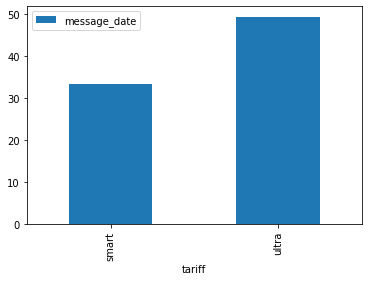

In [63]:
mean_messages.T.plot(kind="bar")
plt.show()
#выводим график отправленных сообщений в среднем в месяц для каждого тарифа

На данном графике видно, что в данной выборке в среднем сообщений в месяц пишут больше бользователи тарифа ultra.

In [64]:
mean_month_messages =pd.DataFrame(df_groupby.groupby(['tariff','month'])['message_date'].mean())

mean_month_messages

message_date
tariff month              
smart  1         18.235294
       2         24.086207
       3         31.857143
       4         30.741071
       5         33.773050
       6         33.402439
       7         33.751244
       8         33.638298
       9         33.638462
       10        33.765306
       11        34.075949
       12        35.994065
ultra  1         33.777778
       2         21.958333
       3         32.297297
       4         31.563636
       5         37.850746
       6         41.726190
       7         49.846154
       8         48.439252
       9         52.286957
       10        58.430894
       11        55.791045
       12        60.611511

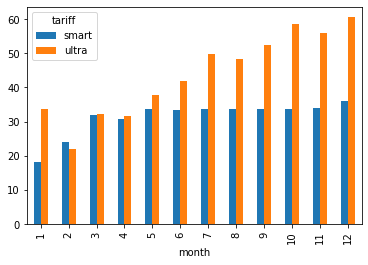

In [65]:
mean_month_messages.pivot_table(index='tariff' ,columns='month', values='message_date').T.plot(kind="bar")
plt.show()
#выводим график отправки сообщений по месяцам для каждого тарифа

Данный график дает нам понять, что для данной выборки  зависимость сообщений от месяца похожа на звонки, однако тут наоборот: пользователи ultra выраженнее постепенно в течение всего года увеличивают количество сообщений, в то время как у обладателей smart явная просадка по сообщениям только в первые 2 месяца года.

In [66]:
variance_month_messages = np.var(mean_month_messages['message_date'], ddof=1)
print('{:.2f}'.format(variance_month_messages))
#дисперсия по всем тарифам 

124.53


In [67]:
print('{:.2f}'.format(math.sqrt(variance_month_messages)))
#стандартное откронение по всем тарифам

11.16


In [68]:
mean_smart_month_messages=mean_month_messages.query('tariff == "smart"')
mean_smart_month_messages
#создаем таблицу только с тарифом smart по запросу

message_date
tariff month              
smart  1         18.235294
       2         24.086207
       3         31.857143
       4         30.741071
       5         33.773050
       6         33.402439
       7         33.751244
       8         33.638298
       9         33.638462
       10        33.765306
       11        34.075949
       12        35.994065

In [69]:
variance_smart_month_messages = np.var(mean_smart_month_messages['message_date'], ddof=1)
print('{:.2f}'.format(variance_smart_month_messages))
#дисперсия по тарифу smart

26.04


In [70]:
print('{:.2f}'.format(math.sqrt(variance_smart_month_messages)))
#стандартное откронение по тарифу smart

5.10


In [71]:
mean_ultra_month_messages=mean_month_messages.query('tariff == "ultra"')
mean_ultra_month_messages
#создаем таблицу только с тарифом ultra по запросу

message_date
tariff month              
ultra  1         33.777778
       2         21.958333
       3         32.297297
       4         31.563636
       5         37.850746
       6         41.726190
       7         49.846154
       8         48.439252
       9         52.286957
       10        58.430894
       11        55.791045
       12        60.611511

In [72]:
variance_ultra_month_messages = np.var(mean_ultra_month_messages['message_date'], ddof=1)
print('{:.2f}'.format(variance_ultra_month_messages))
#дисперсия по тарифу ultra

151.79


In [73]:
print('{:.2f}'.format(math.sqrt(variance_ultra_month_messages)))
#стандартное откронение по тарифу ultra

12.32


In [74]:
messages_mean =pd.DataFrame(df_groupby.groupby(['month'])['message_date'].mean())

messages_mean
#в среднем сообщений в месяц

,message_date
month,
1,21.488372
2,23.463415
3,32.000000
4,31.011976
5,35.086538
6,36.221774
7,38.767123
8,38.269006
9,39.357333


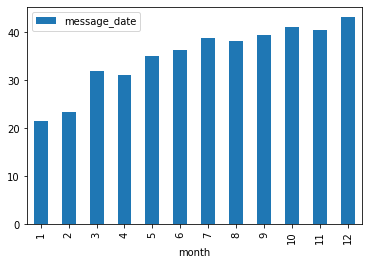

In [75]:
messages_mean.pivot_table(columns='month', values='message_date').T.plot(kind="bar")
plt.show()
#гистограмма распределения отправки сообщений

Данный график дает нам понять, что в начале года пользователи используют меньше всего сообщений и в течение календарного года их количество растет до самого нового года. Такого пика в марте как со звонками уже нет, однако так же выделяются низкие значения в первые 2 месяца. В целом график более равномерный чем со звонками.

Закончили с сообщениями.

##  3.3 Анализ интернет трафика

In [76]:
mean_mb_used=df_groupby.pivot_table(

    columns='tariff',
    values='mb_used',
    aggfunc='mean'
)
mean_mb_used
#создаем таблицу использованых мегабайт интернета в среднем в месяц для каждого тарифа

tariff,smart,ultra
mb_used,16208.38699,19468.805208


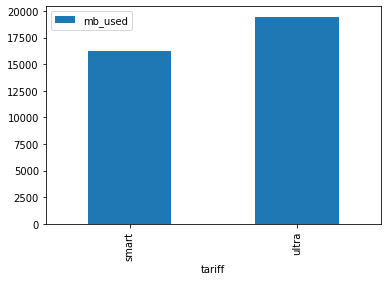

In [77]:
mean_mb_used.T.plot(kind="bar")
plt.show()

#выводим график использованых мегабайт интернета в среднем в месяц для каждого тарифа

На этом графике мы видим, что в данной выборке пользователи ultra в среднем расходуют больше мегабайт в месяц.

In [78]:
mean_month_mb_used =pd.DataFrame(df_groupby.groupby(['tariff','month'])['mb_used'].mean())

mean_month_mb_used

mb_used
tariff month              
smart  1       8513.717647
       2      11597.054310
       3      15104.159091
       4      13462.180625
       5      15805.184326
       6      15794.647988
       7      15743.150348
       8      16610.720085
       9      16303.578808
       10     16757.122891
       11     16895.696646
       12     18113.662047
ultra  1      13140.681111
       2      11775.937500
       3      17535.550270
       4      16828.134364
       5      19363.152985
       6      18924.939286
       7      20495.665165
       8      19576.054673
       9      19204.277130
       10     20045.337317
       11     19786.812463
       12     21793.172590

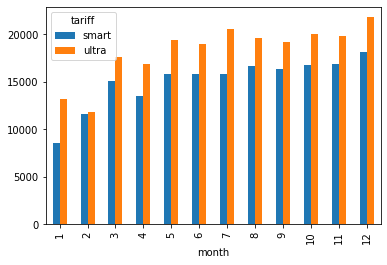

In [79]:
mean_month_mb_used.pivot_table(index='tariff' ,columns='month', values='mb_used').T.plot(kind="bar")
plt.show()
#выводим график использования интернета по месяцам для каждого тарифа

Здесь на графике можно увидеть, что для данной выборки интернет пользователи обоих тарифов расходуют похоже, как и с сообщениями и звонками: количество расходуемого интернета в месяц постепенно растет от первого месяца года к последнему.

In [80]:
variance_month_mb_used = np.var(mean_month_mb_used['mb_used'], ddof=1)
print('{:.2f}'.format(variance_month_mb_used))
#дисперсия по всем тарифам 

10260808.00


In [81]:
print('{:.2f}'.format(math.sqrt(variance_month_mb_used)))
#стандартное откронение по всем тарифам

3203.25


In [82]:
mean_smart_month_mb_used=mean_month_mb_used.query('tariff == "smart"')
mean_smart_month_mb_used
#создаем таблицу только с тарифом smart по запросу

mb_used
tariff month              
smart  1       8513.717647
       2      11597.054310
       3      15104.159091
       4      13462.180625
       5      15805.184326
       6      15794.647988
       7      15743.150348
       8      16610.720085
       9      16303.578808
       10     16757.122891
       11     16895.696646
       12     18113.662047

In [83]:
variance_smart_month_mb_used = np.var(mean_smart_month_mb_used['mb_used'], ddof=1)
print('{:.2f}'.format(variance_smart_month_mb_used))
#дисперсия по тарифу smart

7135321.34


In [84]:
print('{:.2f}'.format(math.sqrt(variance_smart_month_mb_used)))
#стандартное откронение по тарифу smart

2671.20


In [85]:
mean_ultra_month_mb_used=mean_month_mb_used.query('tariff == "ultra"')
mean_ultra_month_mb_used
#создаем таблицу только с тарифом ultra по запросу

mb_used
tariff month              
ultra  1      13140.681111
       2      11775.937500
       3      17535.550270
       4      16828.134364
       5      19363.152985
       6      18924.939286
       7      20495.665165
       8      19576.054673
       9      19204.277130
       10     20045.337317
       11     19786.812463
       12     21793.172590

In [86]:
variance_ultra_month_mb_used = np.var(mean_ultra_month_mb_used['mb_used'], ddof=1)
print('{:.2f}'.format(variance_ultra_month_mb_used))
#дисперсия по тарифу ultra

8915742.06


In [87]:
print('{:.2f}'.format(math.sqrt(variance_ultra_month_mb_used)))
#стандартное откронение по тарифу ultra

2985.92


In [88]:
mb_used_mean =pd.DataFrame(df_groupby.groupby(['month'])['mb_used'].mean())

mb_used_mean
#в среднем интернета в месяц

,mb_used
month,
1,9482.151860
2,11649.410366
3,15893.294825
4,14570.728263
5,16951.260769
6,16854.907944
7,17224.242295
8,17538.470965
9,17193.126293


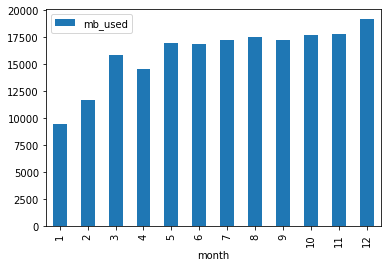

In [89]:
mb_used_mean.pivot_table(columns='month', values='mb_used').T.plot(kind="bar")
plt.show()
#гистограмма распределения использования интернета

Это распределение очень похоже на распределение звонков, в начале года пользователи используют меньше всего интернета и в течение календарного года их количество растет до самого нового года. Видим такой же пик в 3 месяце когда празднуют 8 марта, и абсолютно так же выделяются низкие значения в первые 2 месяца.

Отлично, мы проанализировали данные. 

In [90]:
df_groupby.head()

,user_id,month,message_date,mb_used,duration,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,result
0,1000,5,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0


## 4 Проверим гипотезы

Гипотеза первая:средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Гипитеза вторая:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

##  4.1 Гипотеза первая

In [91]:
result_groupby=pd.DataFrame(df_groupby.groupby(['tariff','user_id'])['result'].mean())

smart_result_groupby=result_groupby.query('tariff=="smart"').sample(n = 148)
smart_result_groupby
#создаем таблицу с выручкой от каждого пользователя тарифа smart и уменьшаем ее до размера такой же таблицы для тарифа ultra

result
tariff user_id             
smart  1283     1450.000000
       1178      701.500000
       1095     1270.000000
       1164      772.222222
       1293      550.000000
...                     ...
       1224     1680.777778
       1131     1750.000000
       1408      987.500000
       1108     1450.000000
       1445     1049.000000

[148 rows x 1 columns]

Создали таблицу с выручкой от пользователей тарифа smart

In [92]:
variance_smart_result = np.var(smart_result_groupby['result'], ddof=1)
print('{:.2f}'.format(variance_smart_result))
#дисперсия по тарифу smart

443117.60


In [93]:
ultra_result_groupby=result_groupby.query('tariff=="ultra"')
ultra_result_groupby
#создаем таблицу с выручкой от каждого пользователя тарифа ultra

result
tariff user_id        
ultra  1000     1950.0
       1003     1950.0
       1004     1950.0
       1013     1950.0
       1016     1950.0
...                ...
       1476     1950.0
       1485     1950.0
       1491     1950.0
       1493     2850.0
       1495     2310.0

[148 rows x 1 columns]

Создали таблицу с выручкой от пользователей тарифа ultra

In [94]:
variance_ultra_result = np.var(ultra_result_groupby['result'], ddof=1)
print('{:.2f}'.format(variance_ultra_result))
#дисперсия по тарифу smart

89121.78


H0: средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различаются


H1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [95]:
#проверим нулевую гипотезу
print('cреднее smart: ', smart_result_groupby.mean())
print('cреднее ultra: ', ultra_result_groupby.mean()) #среднее по обоим тарифам

alpha =0.03 #критический уровень статистической значимости задаем 3%, так как имеем достаточно данных

results =st.ttest_rel(smart_result_groupby,ultra_result_groupby)  #проведем тест и посчитаем p-значение

print('p-значение:', results.pvalue)   #выведим на экран полученное p-значение

if results.pvalue < alpha:          # сравним p-значение с заданным критическим уровнем стат. значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее smart:  result    1398.315014
dtype: float64
cреднее ultra:  result    2086.464659
dtype: float64
p-значение: [3.53299064e-22]
Отвергаем нулевую гипотезу


Как мы видим p-value слишком мало что бы  не отвергнуть нулевую гипотезу. Значит средняя выручка от разных тарифов различается.

Только исходя из проверки гипотезы мы не можем сказать, что больше - только что выручка отличается. Однако посчитав среднее количество выручки для обоих датасетов, с уверенностью можем сказать: больше выручка от тарифа ultra.

##  4.2 Гипотеза вторая

Проверим гипотезу:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [96]:
city_result_groupby=pd.DataFrame(df_groupby.groupby(['tariff','user_id','city'])['result'].mean())

moscow_city_result_groupby=city_result_groupby.query('city=="Москва"')
moscow_city_result_groupby
#создаем таблицу с выручкой от каждого пользователя из Москвы

result
tariff user_id city               
smart  1001    Москва   850.000000
       1007    Москва   913.444444
       1031    Москва   890.500000
       1033    Москва  1914.000000
       1038    Москва   816.666667
...                            ...
ultra  1440    Москва  1950.000000
       1452    Москва  1950.000000
       1453    Москва  1950.000000
       1461    Москва  1950.000000
       1476    Москва  1950.000000

[99 rows x 1 columns]

In [97]:
variance_Moscow_result = np.var(moscow_city_result_groupby['result'], ddof=1)
print('{:.2f}'.format(variance_Moscow_result))
#дисперсия по Москве

367815.33


In [98]:
NOmoscow_city_result_groupby=city_result_groupby.query('city!="Москва"').sample(n = 99)
NOmoscow_city_result_groupby
#создаем таблицу с выручкой от каждого пользователя НЕ из Москвы и уменьшаем ее до размера 'из Москвы'

result
tariff user_id city                        
ultra  1265    Омск             2610.000000
       1416    Санкт-Петербург  1950.000000
       1402    Пенза            1965.000000
smart  1040    Сочи             1407.142857
       1238    Ростов-на-Дону    866.666667
...                                     ...
       1315    Владивосток      1365.166667
       1314    Киров            1837.800000
ultra  1021    Краснодар        1950.000000
smart  1010    Тюмень            910.000000
       1105    Улан-Удэ         2360.750000

[99 rows x 1 columns]

In [99]:
variance_noMoscow_result = np.var(NOmoscow_city_result_groupby['result'], ddof=1)
print('{:.2f}'.format(variance_noMoscow_result))
#дисперсия по городам, кроме Москвы

415918.96


H0: средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов

H1:  средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [100]:
#проверим нулевую гипотезу
print('cреднее smart: ', moscow_city_result_groupby.mean())
print('cреднее ultra: ', NOmoscow_city_result_groupby.mean()) #среднее по обоим тарифам

alpha =0.03 #критический уровень статистической значимости задаем 3%, так как имеем достаточно данных

results =st.ttest_rel(moscow_city_result_groupby,NOmoscow_city_result_groupby)  #проведем тест и посчитаем p-значение

print('p-значение:', results.pvalue)   #выведим на экран полученное p-значение

if results.pvalue < alpha:          #сравним p-значение с заданным критическим уровнем стат. значимости
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее smart:  result    1498.465851
dtype: float64
cреднее ultra:  result    1644.319519
dtype: float64
p-значение: [0.11617583]
Не получилось отвергнуть нулевую гипотезу


Как мы видим, не получилось отвергнуть нулевую гипотезу о том что ср. выручка от Москвичей и остальных клиентов не отличается. А значит выручка существенно не отличается.

## 5 Общий вывод

Мы проанализировали данные и можем сделать следующие выводы: нам пердоставили хорошие данные выборки(без дубликатов или некорректных значений).


Можно сделать выводы, что в среднем в месяц(для данной выборки):

больше минут для разговора исполюзут пользователи тарифа ultra.

сообщений пишут больше бользователи тарифа ultra.

пользователи ultra в среднем расходуют больше мегабайт в месяц.

Так же, сравнивая пользователей двух тарифов мы можем сделать вывод: 

звонки пользователи разных тарифов совершают  по похожей периодичности: в начале года меньше всего разговоров и в течение календарного года это значение растет до самого нового года, правда у пользователей ultra заметно только низкое количество в первые два месяца и максимальное в последний месяц года.
У пользователей тарифа ultra выраженные пики ♤ в посленем месяце (вероятно звонят поздравить родных и друзей с новым годом) и в третьем (можно предположить,что звонят поздравить с восьмым марта).

зависимость сообщений от месяца похожа на звонки, однако тут наоборот: пользователи ultra выраженнее постепенно в течение всего года увеличивают количество сообщений, в то время как у обладателей smart явная просадка по сообщениям только в первые 2 месяца года.

интернет пользователи обоих тарифов расходуют похоже, как и с сообщениями и звонками: количество расходуемого интернета в месяц постепенно растет от первого месяца года к последнему.

Ну и наконец мы проверили 2 гипотезы: 1)средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, 2)средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

1)Нулевую гипотезу (что выручки не отличаются мы отвергли), соотвецтвенно выручки различаются.

2)Нулевую гипотезу (что выручки не отличаются мы не отвергли), соотвецтвенно выручки не отличаются.